# The Seaborn library

`seaborn` is a library built on top of `matplotlib`. Its main purpose is to create well-formatted, statistical visualizations using minimal code. As for `numpy` and `matplotlib`, `seaborn` also has a de-facto standard naming convention, `sns`.

Some exercises may require further tools for a better or simple solution. Feel free to check out the official documentation, ask for help, search for a hint, or even ask a generative AI for problem solving.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 The "Objects" interface, imported as `so` is an optional, newer API, that is the direction of future development, and offers a grammar-of-graphics-style way to create plots.

In [2]:
import seaborn.objects as so

`seaborn` contains a lot of different chart types with a simple interface allows high levels of customization. Compared to `matplotlib`, the interface is also closer in logic to business intelligence software (like Power BI). In most simple scenarios, arrays are not needed to be manipulated directly. In this demonstration, many chart types will be shown in use.

**Faceting** is a powerful feature of `seaborn`, which means that multiple visualizations are created, arranged into separate rows and/or columns, based on category values.

Some of the chart functions are actually wrapper functions for a class of different chart types. These wrapper functions support faceting, by working with and returning a `FacetGrid` object. Such functions are figure-level, so it is not possible to render them onto a specific axes of a figure.

For this tutorial, the Students Performance dataset is used. This synthetic data table consists of 1000 students' results in multiple subjects, containing also some demographic data.

If you run this notebook in Google Colab, do not forget to upload the file `StudentsPerformance.csv` for the session.

Source: https://www.kaggle.com/datasets/sadiajavedd/students-academic-performance-dataset (downloaded at 2025-11-06)

In [3]:
df = pd.read_csv("StudentsPerformance.csv", sep=",")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Note that `seaborn` also has some built-in datasets for demonstration purposes.

In [4]:
# print(sns.get_dataset_names())
df_tips = sns.load_dataset("tips")

df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distribution visualizations

The `histplot()` chart type can be used to display a distribution of a single numeric field.

Note that the `histplot()` function has a parameter `x=` which works like *wells* in Power BI: accepting a field from the data source. This is how the interface generally works in `seaborn`. Different chart types support different parameters that accept data fields.

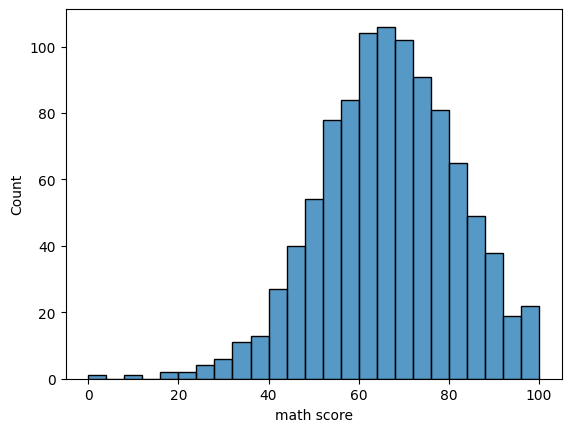

In [5]:
sns.histplot(
    data=df,
    x="math score",
)
plt.show()

It is also possible to pass arrays to simple chart types, as in classic `matplotlib`, but using the `df=` parameter to pass a single data frame as source is cleaner.

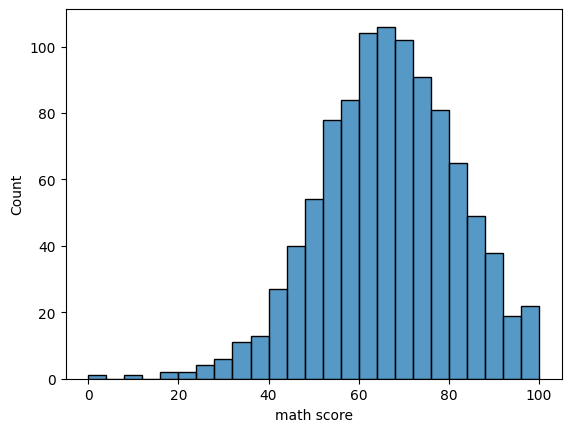

In [6]:
sns.histplot(
    x=df["math score"],
)
plt.show()

The object-oriented approach inherited from `matplotlib` can be adapted, that involves managing the figure and axes objects directly. Simple chart types support the `ax=` parameter to display the visual onto a specific axes object.

This is useful for managing subplots, and formatting the axes afterwards.

Note that `histplot()` supports the visualization of a KDE (Kernel Density Estimate) using `kde=True`, and the meaning of the bar lenghts can also be manipulated by the `stat=` parameter.

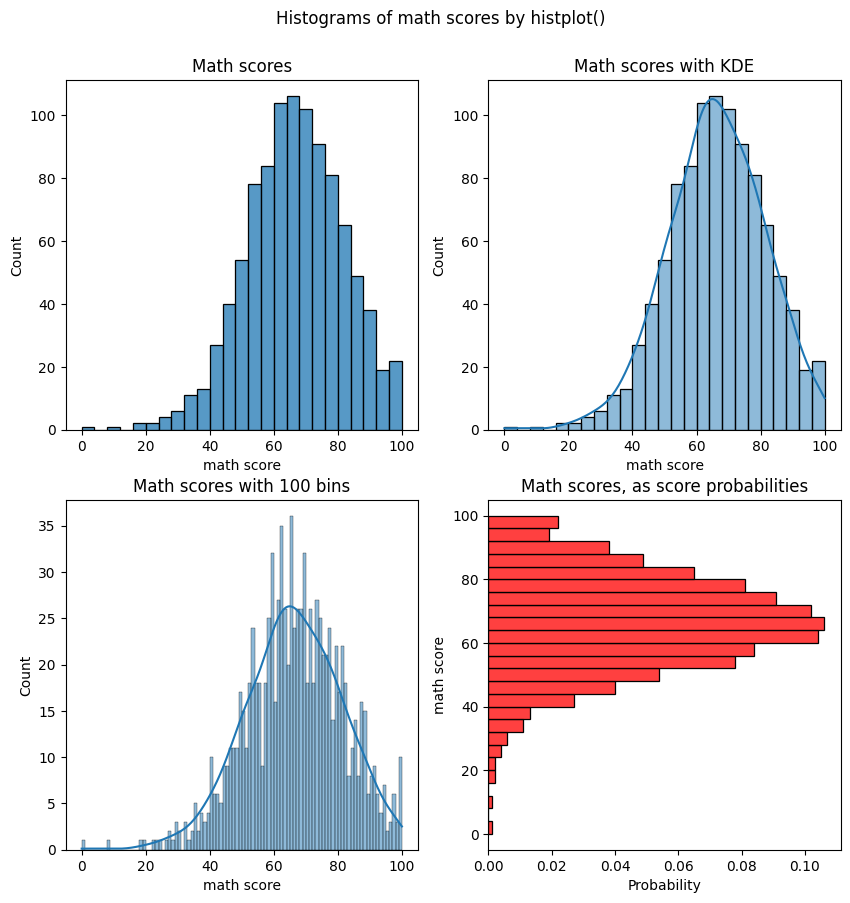

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(
    data=df,
    x="math score",
    ax=ax1,
)
ax1.set_title("Math scores")
sns.histplot(
    data=df,
    x="math score",
    kde=True,
    ax=ax2,
)
ax2.set_title("Math scores with KDE")
sns.histplot(
    data=df,
    x="math score",
    bins=100,
    kde=True,
    ax=ax3,
)
ax3.set_title("Math scores with 100 bins")
sns.histplot(
    data=df,
    y="math score",
    color="#FF0000",
    stat="probability",
    ax=ax4,
)
ax4.set_title("Math scores, as score probabilities")
plt.suptitle("Histograms of math scores by histplot()", y=0.95)
# fig.show() # if precise control is needed, otherwise:
plt.show()

The `hue=` parameter can optionally refer to a category field. The placement of the histograms for each category can be set by the `multiple=` parameter.

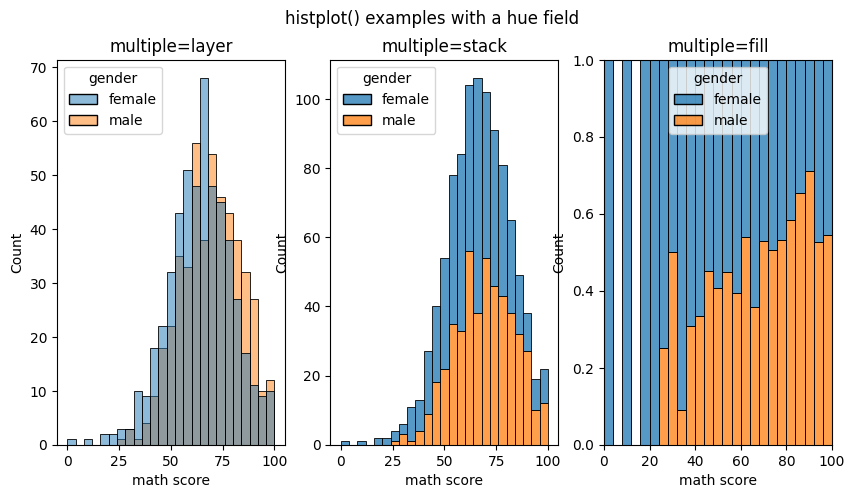

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
sns.histplot(
    data=df,
    x="math score",
    hue="gender",
    multiple="layer",
    ax=ax1,
)
ax1.set_title("multiple=layer")
sns.histplot(
    data=df,
    x="math score",
    hue="gender",
    multiple="stack",
    ax=ax2,
)
ax2.set_title("multiple=stack")
sns.histplot(
    data=df,
    x="math score",
    hue="gender",
    multiple="fill",
    ax=ax3,
)
ax3.set_title("multiple=fill")
plt.suptitle("histplot() examples with a hue field")
plt.show()

2D-histograms that show the joint distribution of two variables can also be drawn with `histplot()`.

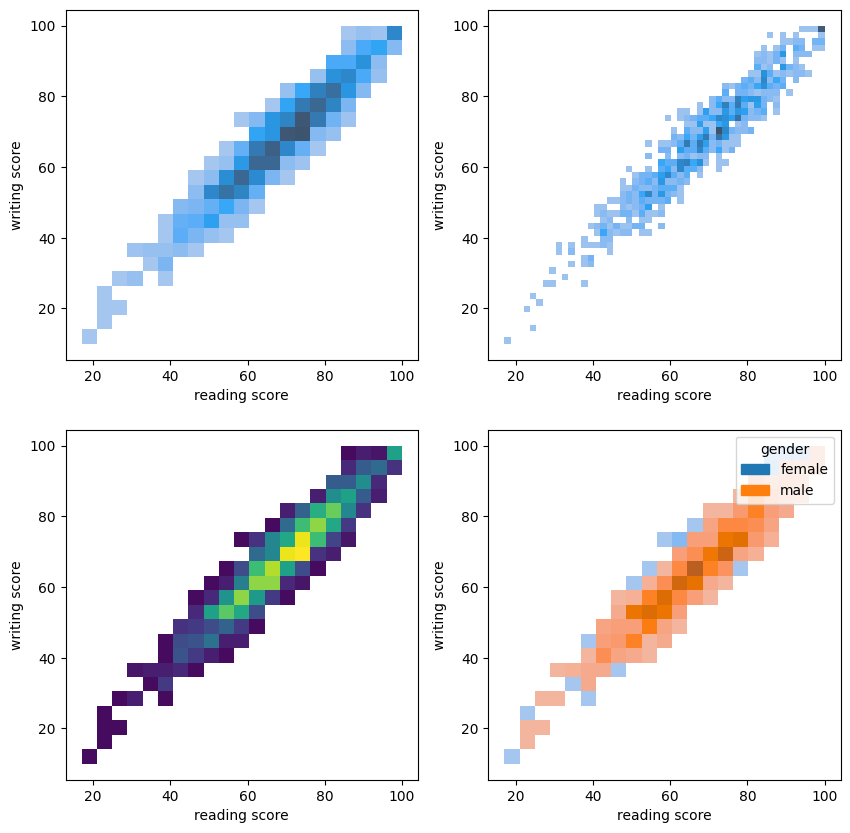

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(
    data=df,
    x="reading score",
    y="writing score",
    ax=ax1,
)
sns.histplot(
    data=df,
    x="reading score",
    y="writing score",
    bins=50,
    ax=ax2,
)
sns.histplot(
    data=df,
    x="reading score",
    y="writing score",
    cmap="viridis",
    ax=ax3,
)
sns.histplot(
    data=df,
    x="reading score",
    y="writing score",
    hue="gender",
    ax=ax4,
)
plt.show()

A KDE curve can be drawn directly by `kdeplot()`. The logic is the same as for `histplot()`, but instead of bins, there is only a single curve.

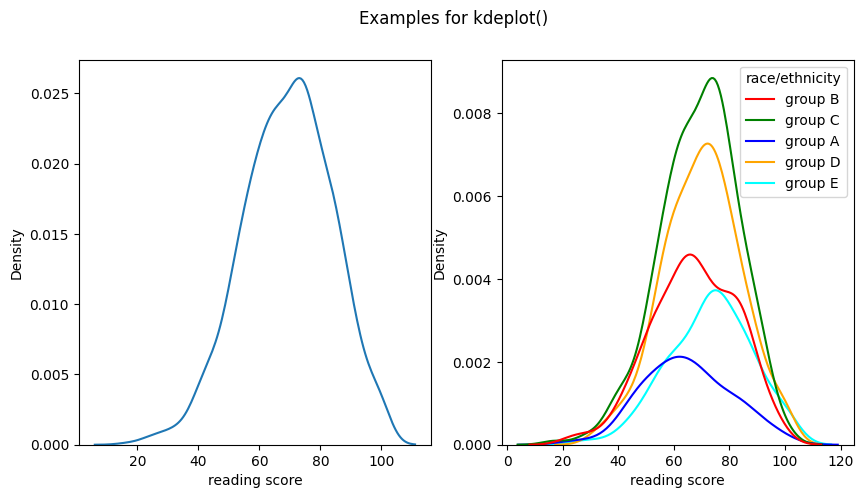

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(
    data=df,
    x="reading score",
    ax=ax1,
)
sns.kdeplot(
    data=df,
    x="reading score",
    hue="race/ethnicity",
    palette=["red","green","blue","orange","cyan"],
    multiple="layer", # default
    ax=ax2,
)
plt.suptitle("Examples for kdeplot()")
plt.show()

`kdeplot()` can also be used to show a joint distribution of two numeric fields, a 2D-KDE.

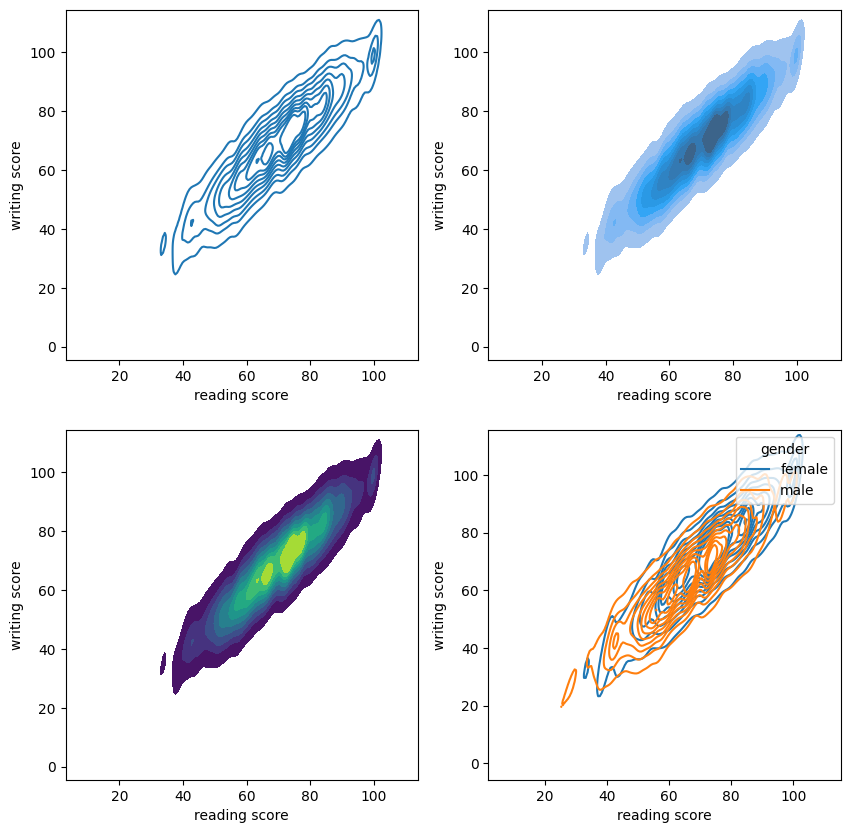

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(
    data=df,
    x="reading score",
    y="writing score",
    ax=ax1,
)
sns.kdeplot(
    data=df,
    x="reading score",
    y="writing score",
    fill=True,
    ax=ax2,
)
sns.kdeplot(
    data=df,
    x="reading score",
    y="writing score",
    fill=True,
    cmap="viridis",
    ax=ax3,
)
sns.kdeplot(
    data=df,
    x="reading score",
    y="writing score",
    hue="gender",
    ax=ax4,
)
plt.show()

`ecdfplot()` can be used to draw an ECDF (Empirical Cumulative Distribution Function).

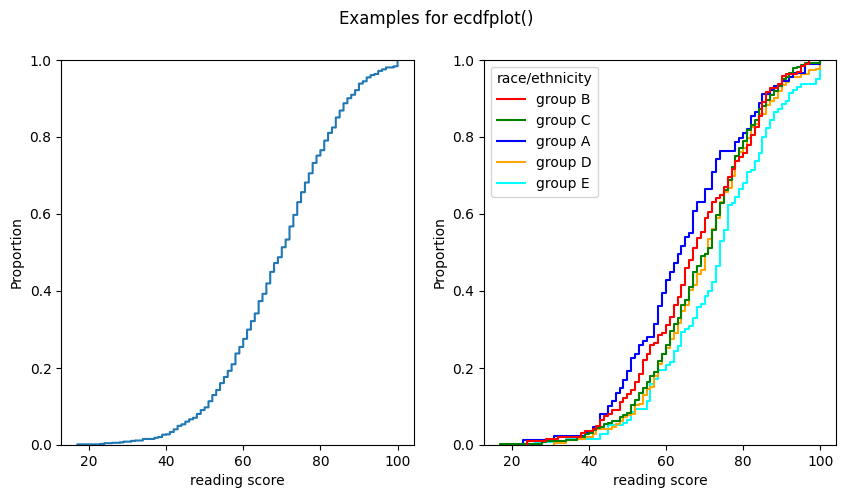

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.ecdfplot(
    data=df,
    x="reading score",
    ax=ax1,
)
sns.ecdfplot(
    data=df,
    x="reading score",
    hue="race/ethnicity",
    palette=["red","green","blue","orange","cyan"],
    ax=ax2,
)
plt.suptitle("Examples for ecdfplot()")
plt.show()

The `displot()` function is a wrapper function for distribution-displaying plots, that supports `histplot()`, `kdeplot()`, and `ecdfplot()`, with the `kind=` parameter.

**Note**: not to be confused with `distplot()`, which is a deprecated function.

`displot()` uses its own `FacetGrid`, so it is a figure-level function, and cannot be assigned to an axes of a figure.

**Faceting** is supported in the following way. The `row=` or `col=` parameter can accept a category field, which results in multiple charts for each category value.

This kind of wrapper design pattern is also available for other plot classes in `seaborn`, see later.

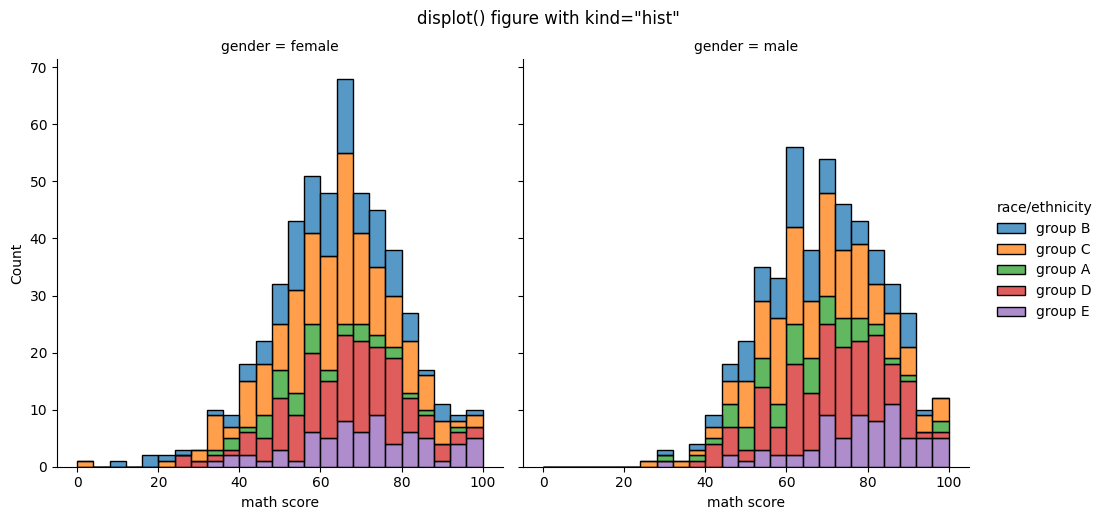

In [13]:
sns.displot(
    data=df,
    x="math score",
    hue="race/ethnicity",
    multiple="stack",
    col="gender",
    kind="hist",
)
plt.suptitle("displot() figure with kind=\"hist\"", y=1.03)
plt.show()

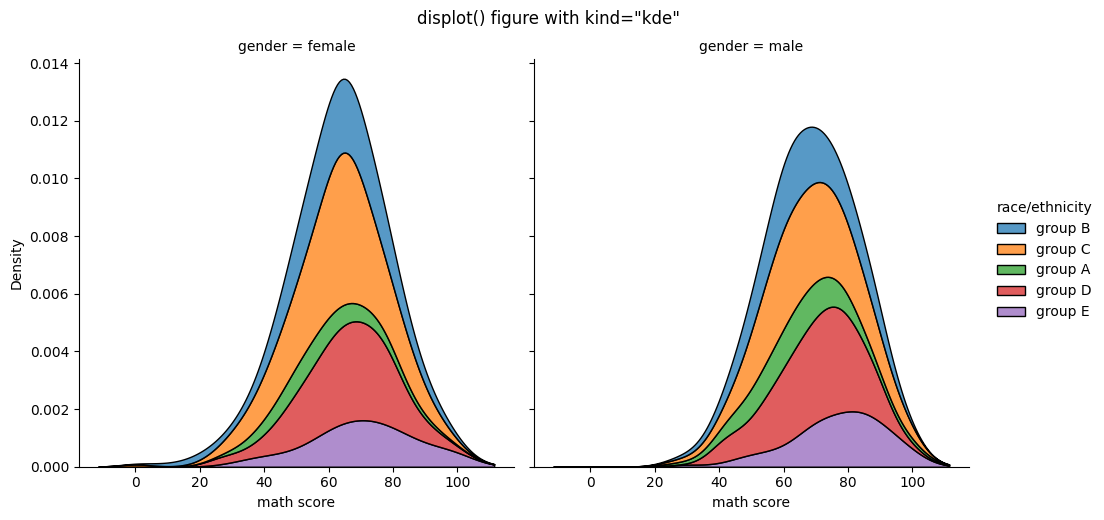

In [14]:
sns.displot(
    data=df,
    x="math score",
    hue="race/ethnicity",
    multiple="stack",
    col="gender",
    kind="kde",
)
plt.suptitle("displot() figure with kind=\"kde\"", y=1.03)
plt.show()

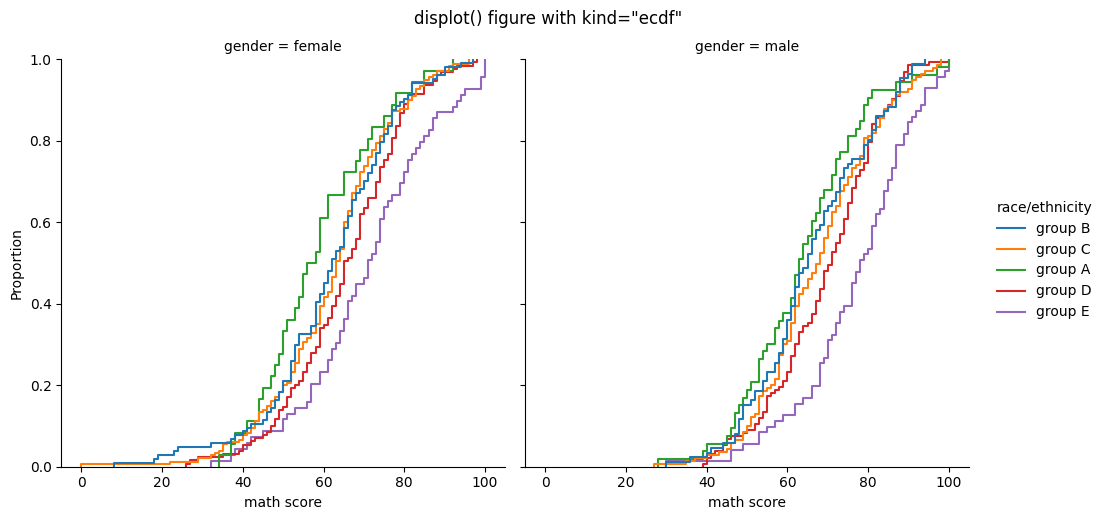

In [15]:
sns.displot(
    data=df,
    x="math score",
    hue="race/ethnicity",
    col="gender",
    kind="ecdf",
)
plt.suptitle("displot() figure with kind=\"ecdf\"", y=1.03)
plt.show()

## Exercise (Distribution visualizations)

Create distribution visualizations with `seaborn`, one for each of the following scenarios.

*   We are curious about a histogram with 50 bins for reading scores.
*   We would like to see a curve displaying reading scores for each parental level of education, on a single diagram.
*   We need to show the cumulative distribution function of reading scores for each parental level of education, in two separate charts for the two possible lunch types.

## Solution (Distribution visualizations)

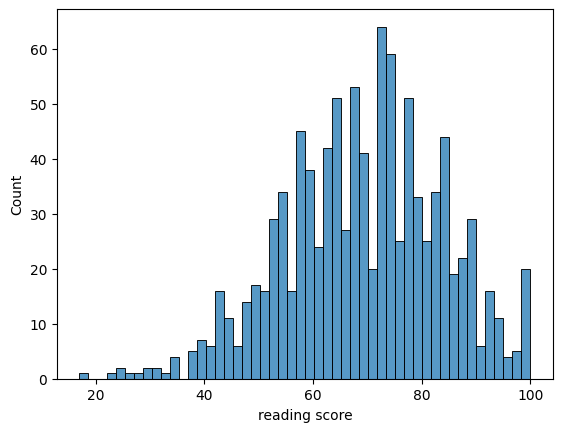

In [16]:
sns.histplot(
    data=df,
    x="reading score",
    bins=50,
)
plt.show()

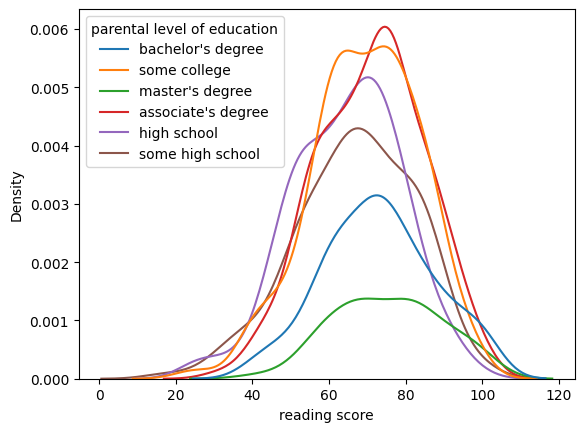

In [17]:
sns.kdeplot(
    data=df,
    x="reading score",
    hue="parental level of education",
)
plt.show()

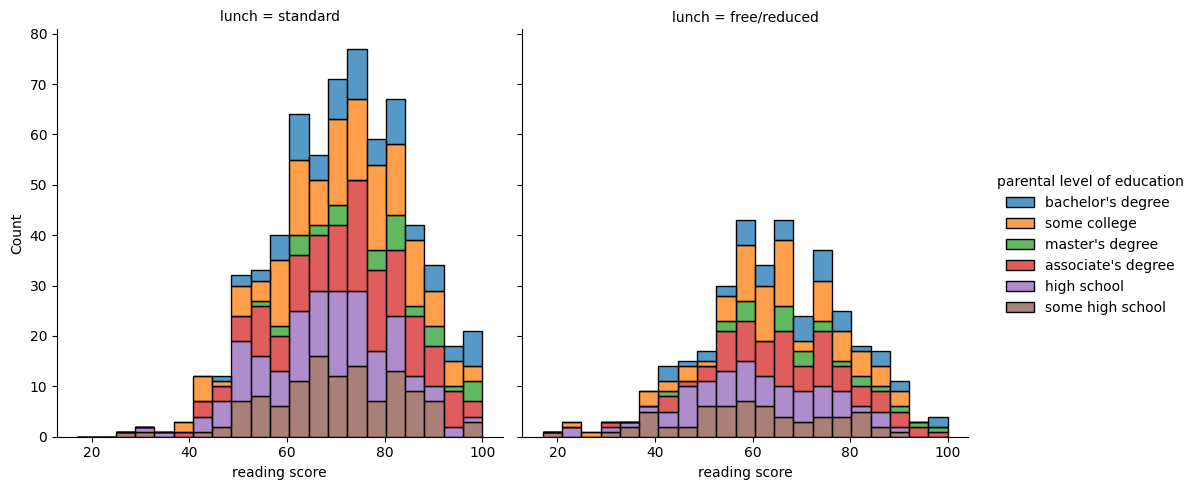

In [18]:
sns.displot(
    data=df,
    x="reading score",
    hue="parental level of education",
    multiple="stack",
    col="lunch",
)
plt.show()

# Scatter chart types

Scatter plots can be created with the `scatterplot()` function, which accepts two basic numeric dimensions (`x`, `y`), and up to three others (`hue`, `style`, and `size`, the latter can also be numeric).

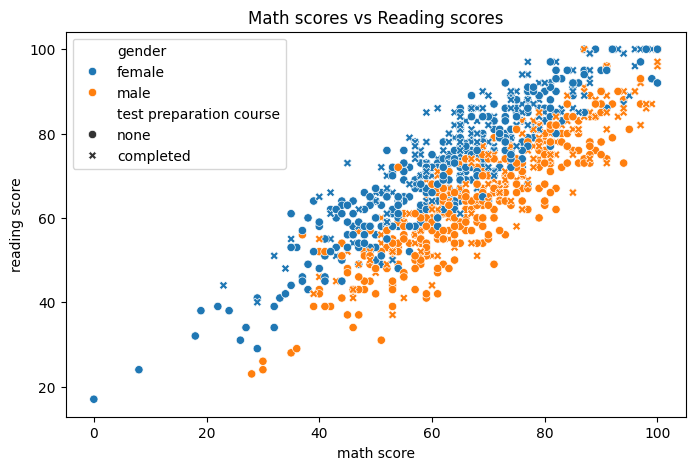

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="math score",
    y="reading score",
    hue="gender",
    style="test preparation course"
)
plt.title("Math scores vs Reading scores")
plt.show()

In `seaborn`, theme styles can be set globally ("darkgrid", "whitegrid", "dark", "white", "ticks").

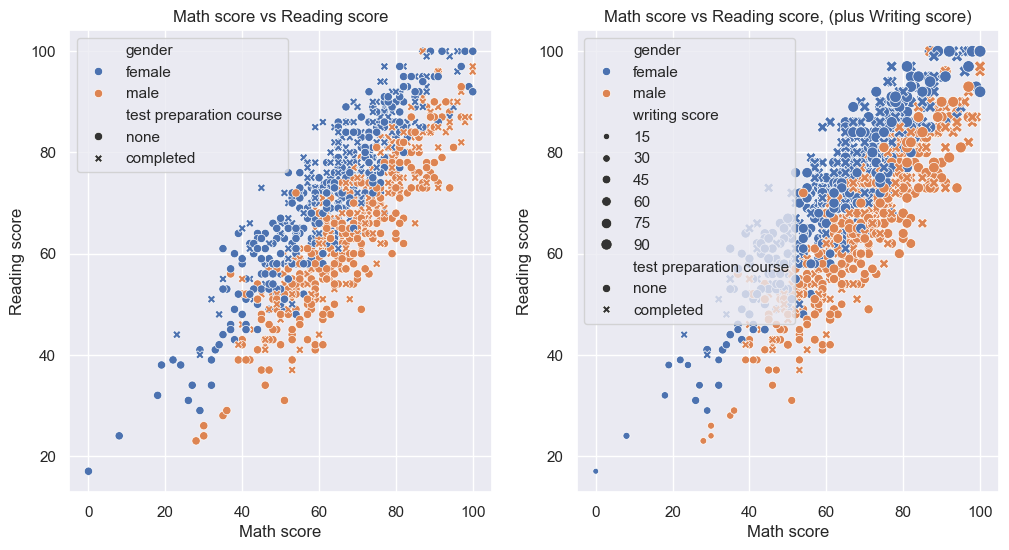

In [20]:
sns.set_theme(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="math score",
    y="reading score",
    hue="gender",
    style="test preparation course",
    ax=ax1,
)
ax1.set_title("Math score vs Reading score")
ax1.set_xlabel("Math score")
ax1.set_ylabel("Reading score")
sns.scatterplot(
    data=df,
    x="math score",
    y="reading score",
    hue="gender",
    style="test preparation course",
    size="writing score",
    ax=ax2,
)
ax2.set_title("Math score vs Reading score, (plus Writing score)")
ax2.set_xlabel("Math score")
ax2.set_ylabel("Reading score")

sns.set_theme(style="white")

Instead of global settings like `sns.set_theme()`, settings can be applied in a local scope with a `with` statement. Custom palettes, plotting context (e.g. different fonts and sizes in documentation and presentation), and more can be set this way.

The appearance of the chart can be manipulated as in `matplotlib`, or using the features of `matplotlib` directly.

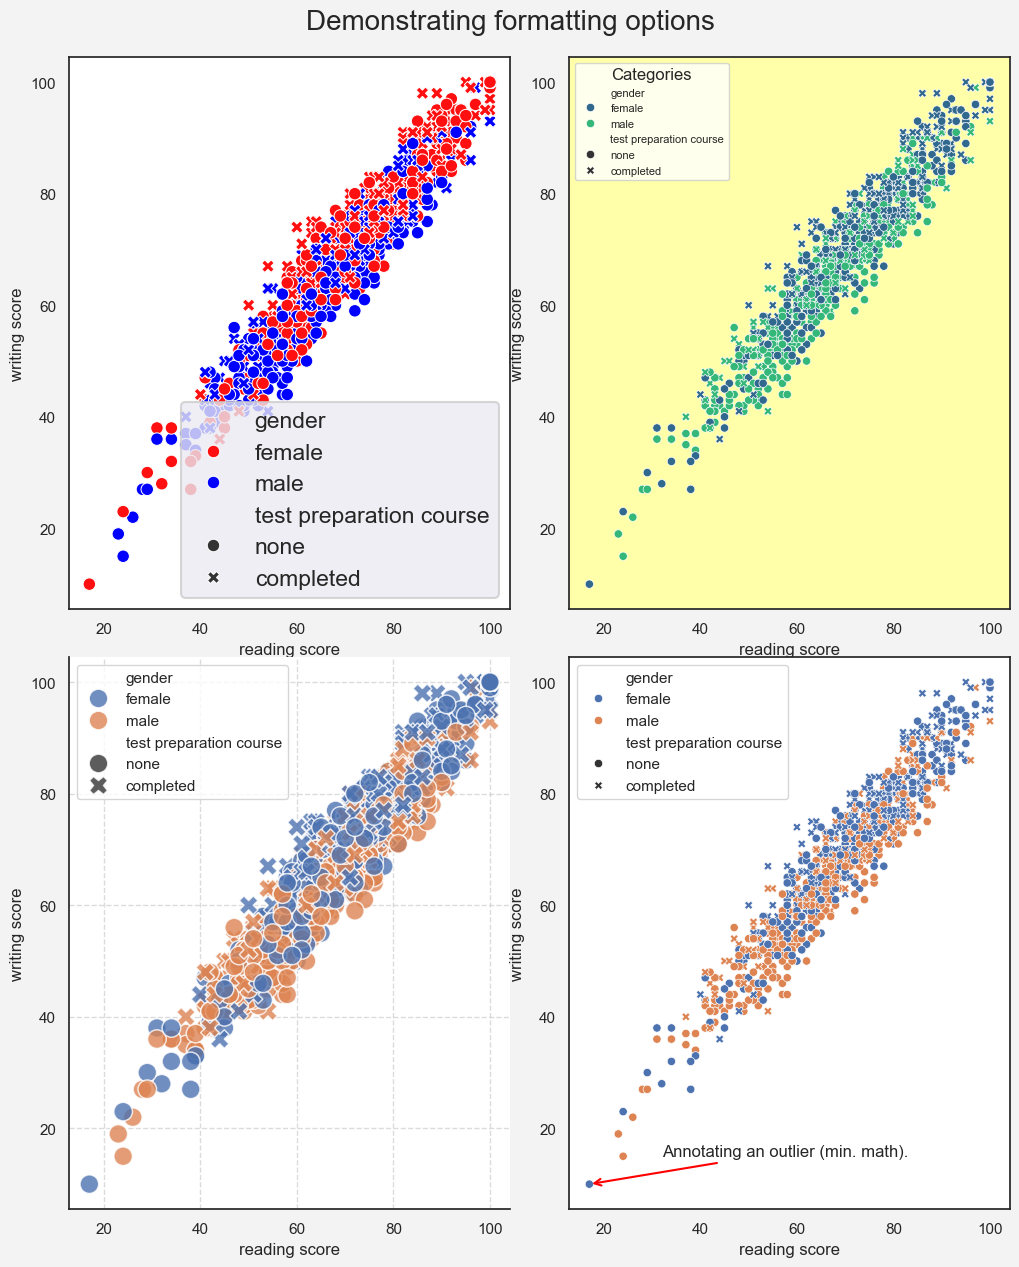

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))

custom_colors = ["#ff0f0f", "blue"]
with (
    sns.axes_style("darkgrid"),
    sns.color_palette(custom_colors), # can be a named, built-in palette
    sns.plotting_context("talk")
):
    sns.scatterplot(
        data=df,
        x="reading score",
        y="writing score",
        hue="gender",
        style="test preparation course",
        ax=ax1,
    )

sns.scatterplot(
    data=df,
    x="reading score",
    y="writing score",
    hue="gender",
    style="test preparation course",
    palette="viridis",
    ax=ax2,
)
legend = ax2.legend(title="Categories", loc="upper left", fontsize=8)
legend.get_title().set_fontsize(12)
ax2.set_facecolor("#ffffaa")

sns.scatterplot(
    data=df,
    x="reading score",
    y="writing score",
    hue="gender",
    style="test preparation course",
    s=180, # matplotlib
    alpha=0.8,
    ax=ax3,
)
ax3.grid(alpha=0.7, linestyle="--")
sns.despine(ax=ax3)

sns.scatterplot(
    data=df,
    x="reading score",
    y="writing score",
    hue="gender",
    style="test preparation course",
    ax=ax4,
)
min_idx = df["math score"].idxmin()
x = df.loc[min_idx, "reading score"]
y = df.loc[min_idx, "writing score"]
ax4.annotate(
    "Annotating an outlier (min. math).",
    xy=(x, y),
    xytext=(x + 15, y + 5),
    arrowprops=dict(arrowstyle="->", lw=1.5, color="red")
)

fig.tight_layout(pad=0)
fig.patch.set_facecolor("#f3f3f3")
fig.suptitle("Demonstrating formatting options", fontsize=20, y=1.04)

plt.show()

Note that some parameters are not `seaborn` parameters but are accepted by `matplotlib`. For example, `size=` is the parameter supported by `seaborn`, which also accepts a column name. However, `s=` can also be used, which is interpreted by matplotlib, and accepts a fixed size or an array.

**Filtering** the data source is best done on the input data frame directly before passing it to `seaborn` (see the following example).

The `regplot()` chart type is useful for drawing a regression line and CI band automatically, but it does not support further categorical fields.

Notice that keyword arguments can be passed for formatting the regression line. The same technique is very common: a `*_kws` argument passes keyword arguments to the underlying `matplotlib` function that draws an element.

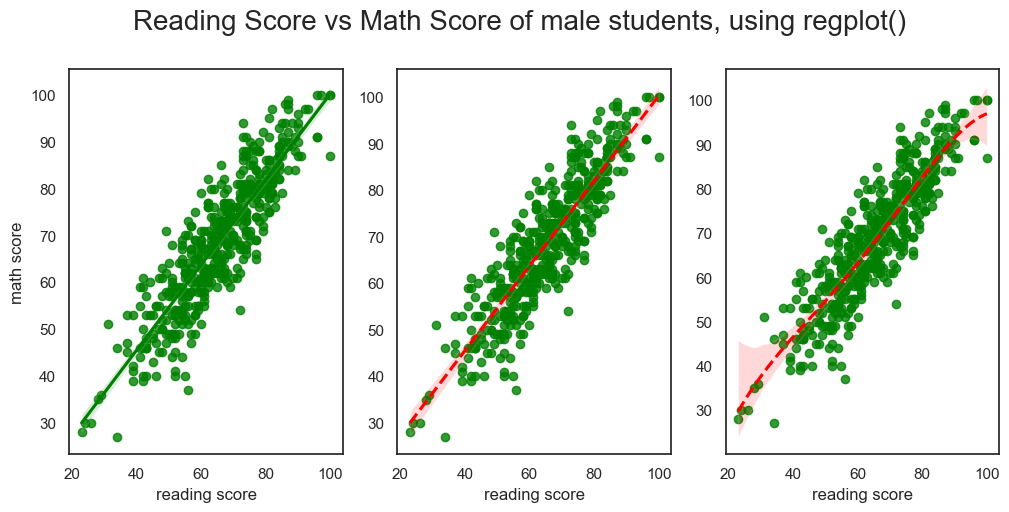

In [22]:
df_male = df[df["gender"] == "male"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
sns.regplot(
    data=df_male,
    x="reading score",
    y="math score",
    color="green",
    ax=ax1,
)
sns.regplot(
    data=df_male,
    x="reading score",
    y="math score",
    color="green",
    ax=ax2,
    line_kws={"color": "red", "linestyle": "--"},
    ci=99,
)
ax2.set_ylabel("")
sns.regplot(
    data=df_male,
    x="reading score",
    y="math score",
    color="green",
    ax=ax3,
    line_kws={"color": "red", "linestyle": "--"},
    ci=99,
    order=4,
)
ax3.set_ylabel("")
fig.suptitle(
    "Reading Score vs Math Score of male students, using regplot()",
    fontsize=20,
    y=1.0,
)
plt.show()

The `lmplot()` function is the wrapper function that supports `scatterplot()` and `regplot()`, and faceting.

`lmplot()` does not support the `style` parameter, and is more limited in markers than `scatterplot()`.

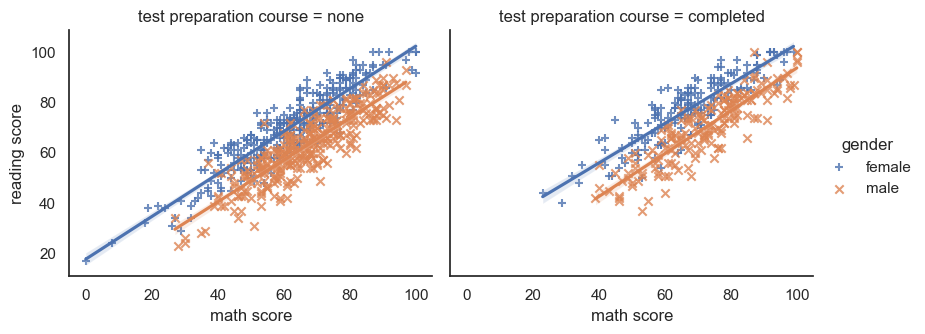

In [23]:
sns.lmplot(
    data=df,
    x="math score",
    y="reading score",
    hue="gender", # color groups
    markers=["+", "x"], # optional: tie markers to hue groups
    col="test preparation course",
    # ci=95, # default
    height=3.5,
    aspect=1.2,
)
plt.show()

## Exercise (Scatter charts)

Create scatter charts with `seaborn`, one for each of the following scenarios.

*   We are curious that within race/etchnicity group A, what is the relationship between reading and writing scores, and we also want a comparison of those students who took the preparation course and those who not (possibly with regression lines).
*   We want to display the reading and writing scores of each student whose lunch is not "standard", so that their race/ethnicity is also visible.
*   We want to compare total score with the difference of math and the average of reading and writing scores, among all students. Repeat the same by each gender.

## Solution (Scatter charts)

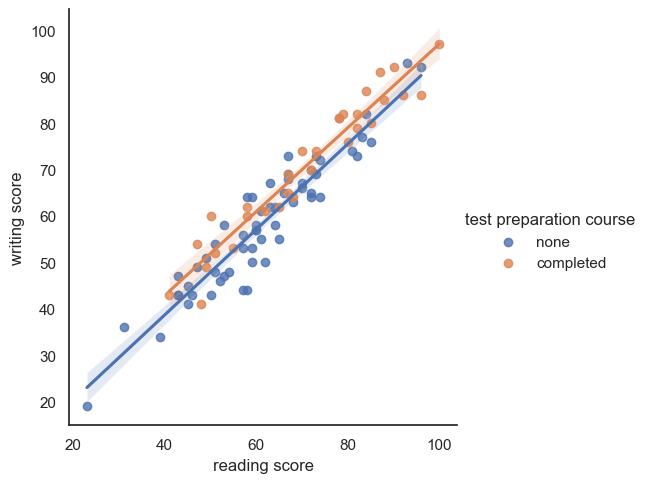

In [24]:
df_group_A = df[df["race/ethnicity"] == "group A"]
sns.lmplot(
    data=df_group_A,
    x="reading score",
    y="writing score",
    hue="test preparation course",
    # ci=95,
)
plt.show()

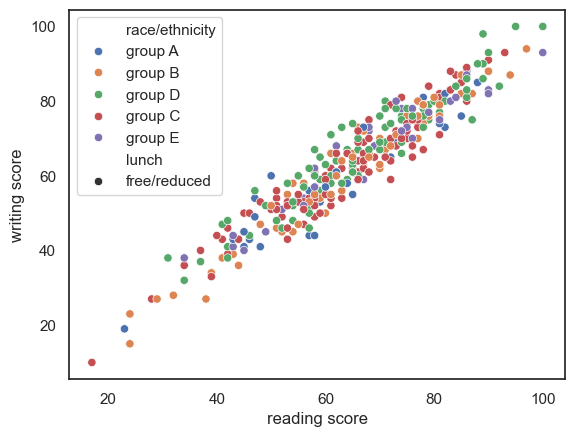

In [25]:
df_nonstandard_lunch = df[df["lunch"] != "standard"]
sns.scatterplot(
    data=df_nonstandard_lunch,
    x="reading score",
    y="writing score",
    hue="race/ethnicity",
    style="lunch",
)
plt.show()

For the third part, an almost correct solution by `regplot()` is the following. It accepts arrays as `x=` and `y=`. However, `regplot()` does not support categorization (by gender) directly.

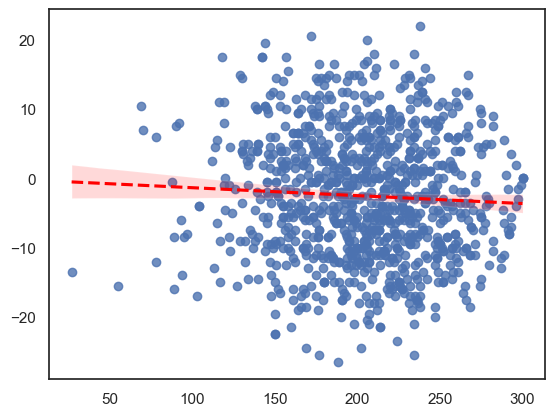

In [26]:
sns.regplot(
    x=df["math score"] + df["reading score"] + df["writing score"],
    y=df["math score"] - (df["reading score"] + df["writing score"]) / 2,
    line_kws={"color": "red", "linestyle": "--"},
)
plt.show()

To do the same by gender, `lmplot()` is used again, because it has a `hue=` parameter. Note that unlike for `regplot()`, a data frame is required to be passed.

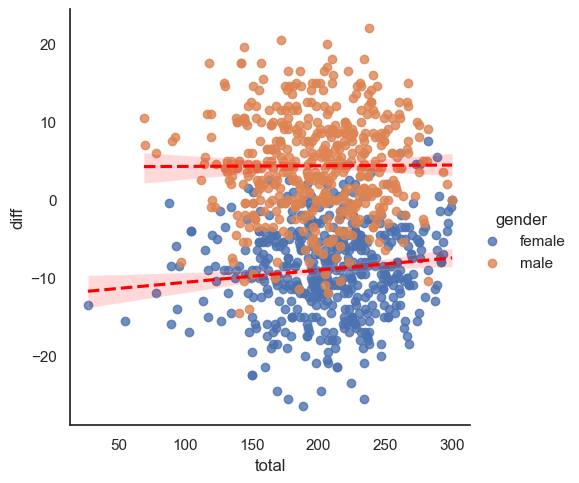

In [27]:
df_extra=df.copy() # copied (we don't want to extend the original)
df_extra["total"] = df["math score"] + df["reading score"] + df["writing score"]
df_extra["diff"] = df["math score"] - (df["reading score"] + df["writing score"]) / 2
sns.lmplot(
    data=df_extra,
    x="total",
    y="diff",
    hue="gender",
    line_kws={"color": "red", "linestyle": "--"},
)
plt.show()

# Categorical chart types

Bar plots created by `barplot()` work using a categorical column and a numeric column. Switching `x=` and `y=` transposes the chart (creating a horizontal bar chart from a column chart and vice versa).

The **estimator** can be any mapper from a vector to a scalar, e.g. `sum`, `np.mean`, `np.median`, etc.

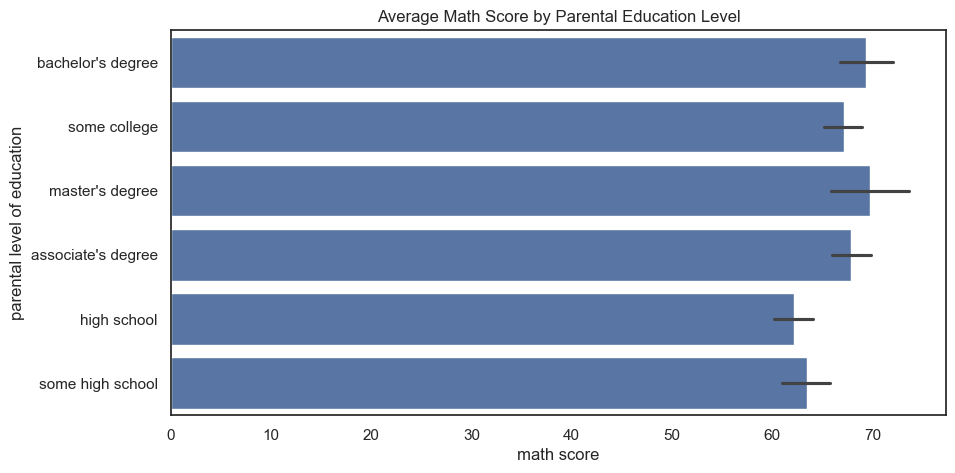

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x="math score",
    y="parental level of education",
    estimator=np.mean,
)
plt.title("Average Math Score by Parental Education Level")
plt.show()

If a category field needs to be sorted, the `order=` parameter can be used, which accepts an explicit list. Many chart types in `seaborn` have similarly working parameters, e.g. `hue_order`.

Confidence intervals with 95% are used by default for the error bar, but that can be changed, see the example below.

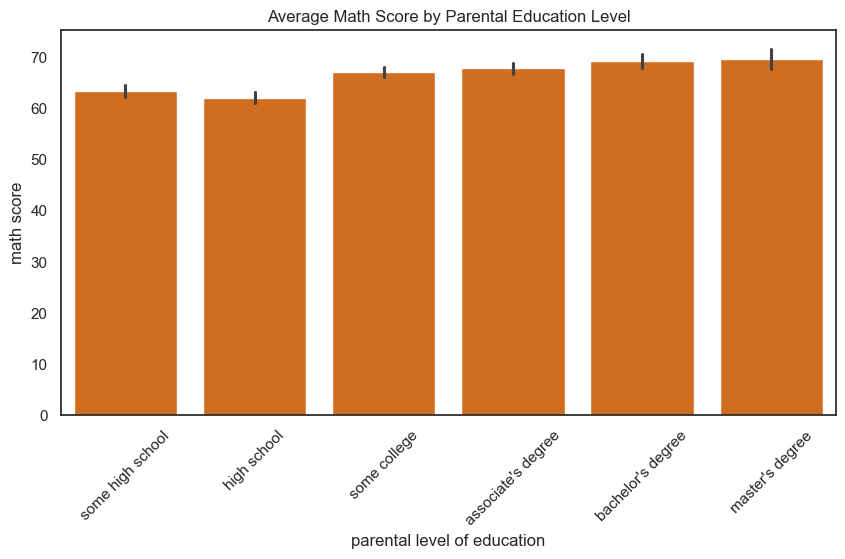

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x="parental level of education",
    y="math score",
    order=["some high school", "high school", "some college",
           "associate's degree", "bachelor's degree", "master's degree"],
    estimator=np.mean,
    color="#ef6a00",
    # errorbar=("ci", 95), # confidence interval
    errorbar=("se", 1), # standard error
)
plt.xticks(rotation=45)
plt.title("Average Math Score by Parental Education Level")
plt.show()

An ordering can be hard-coded into the data frame itself by converting the column type to a categorical type using `pd.Categorical`. Then, `seaborn` charts will obey it without the need of an ordering argument.

**Important note**: if category names are missing, mistyped, or change in the original dataset, the code may silently break.

In [30]:
df["parental level of education"] = pd.Categorical(
    df["parental level of education"],
    categories=[
        "some high school",
        "high school",
        "some college",
        "associate's degree",
        "bachelor's degree",
        "master's degree",
    ],
    ordered=True,
)
df["gender"] = pd.Categorical(
    df["gender"],
    categories=[
        "female",
        "male",
    ],
    ordered=True,
)

The `hue=` parameter supports an additionaly category, which results int a *clustered* bar chart.

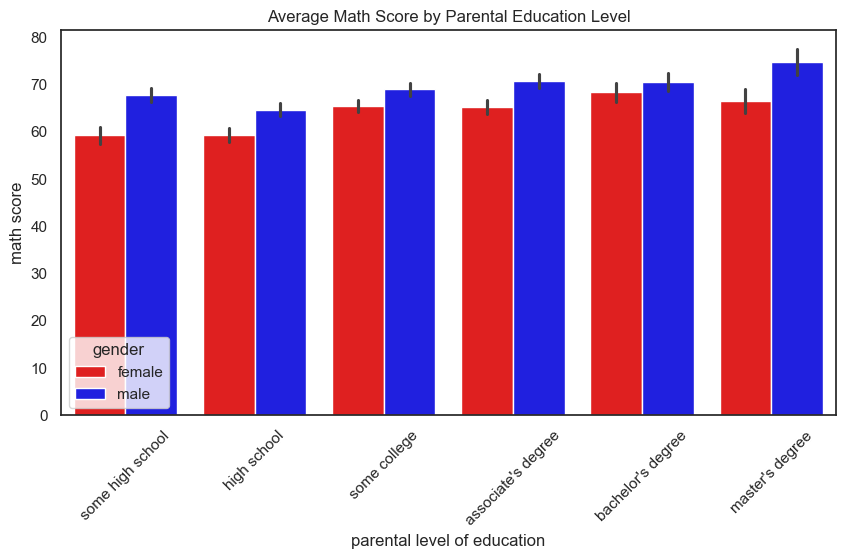

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x="parental level of education",
    y="math score",
    hue="gender",
    estimator=np.mean,
    palette=["red", "blue"],
    errorbar=("se", 1), # standard error
)
plt.xticks(rotation=45)
plt.title("Average Math Score by Parental Education Level")
plt.show()

Creating a *stacked* bar chart instead of a *clustered* one requires some manual work. In the following example, it is not done by `seaborn`, although its theme can be used.

Note that stacking this kind of data is very useful, it is shown here for demonstration.

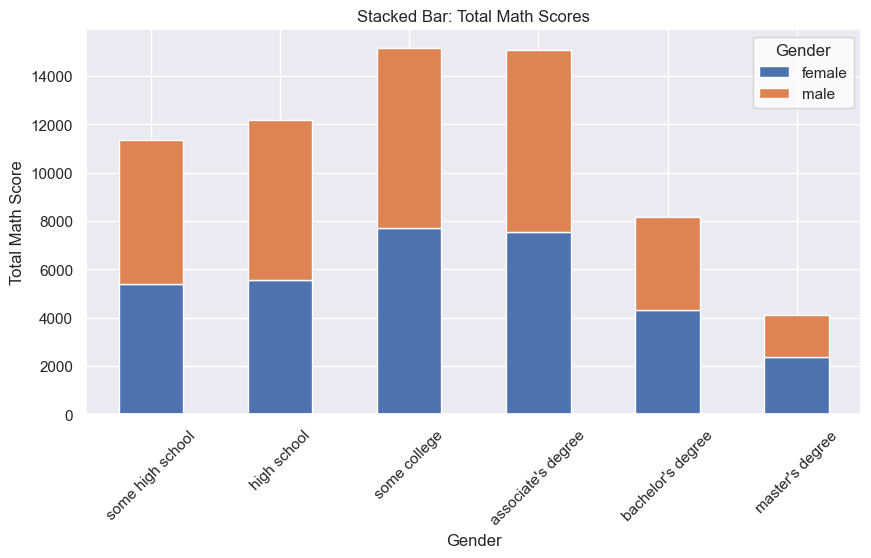

In [32]:
stacked_data = (
    df.groupby(["parental level of education", "gender"], observed=True)["math score"]
      .sum()
      .unstack(fill_value=0)
)
with sns.axes_style("darkgrid"):
    stacked_data.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.title("Stacked Bar: Total Math Scores")
plt.xlabel("Gender")
plt.ylabel("Total Math Score")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

Note that `sns.axes_style("darkgrid")` was applied locally by using a `with` statement.

If only the number of rows needs to be visualized, `countplot()` is sufficient. It is very similar to `barplot()`, but a custom `estimator=` is not supported (since the aggregation is always row count). Also, there are no error bars.

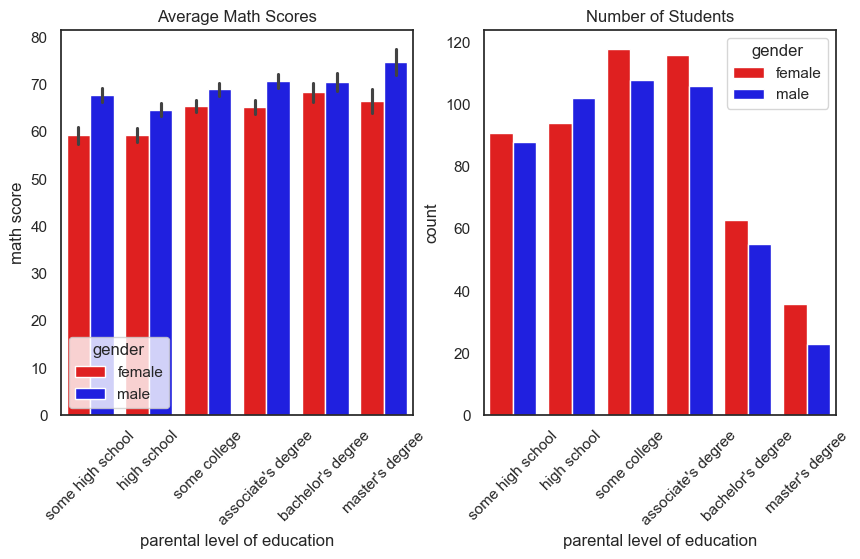

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(
    data=df,
    x="parental level of education",
    y="math score",
    hue="gender",
    estimator=np.mean,
    palette=["red", "blue"],
    errorbar=("se", 1), # standard error,
    ax=ax1,
)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Average Math Scores")
sns.countplot(
    data=df,
    x="parental level of education",
    hue="gender",
    palette=["red", "blue"],
    ax=ax2,
)
ax2.tick_params(axis='x', rotation=45)
ax2.set_title("Number of Students")
plt.show()

With `stripplot()`, data points along a single axis can be displayed.

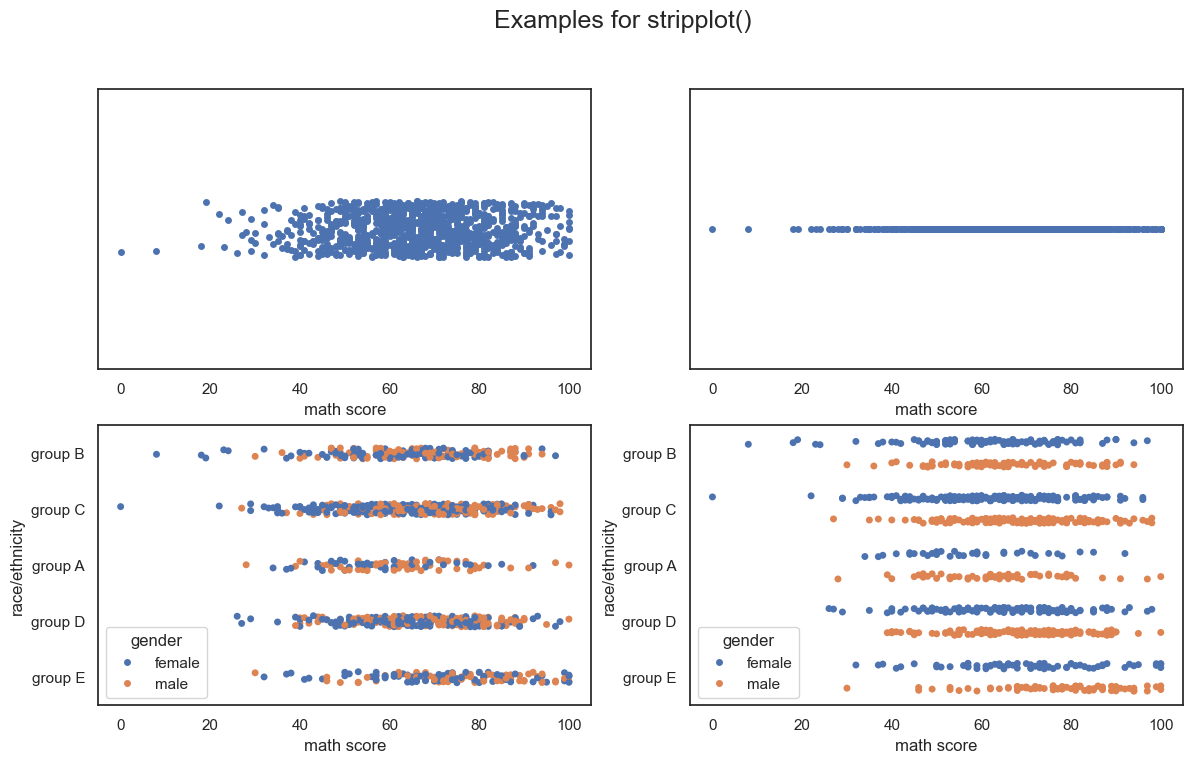

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
sns.stripplot(
    data=df,
    x="math score",
    # jitter=True, # helps avoid overlaps, can be a number, or False
    ax=ax1,
)
sns.stripplot(
    data=df,
    x="math score",
    jitter=False,
    ax=ax2,
)
sns.stripplot(
    data=df,
    x="math score",
    y="race/ethnicity",
    hue="gender",
    ax=ax3,
)
sns.stripplot(
    data=df,
    x="math score",
    y="race/ethnicity",
    hue="gender",
    dodge=True,
    ax=ax4,
)
plt.suptitle("Examples for stripplot()", fontsize=18)
plt.show()

`swarmplot()` does the same as `stripplot()` but automatically avoids overlaps. Therefore, `jitter=` is meaningless. Useful for small number of data points. The `size=` parameter can be used to fit more points into the chart. Can take much longer to render. If there are too many points that cannot fit, a warning is raised.

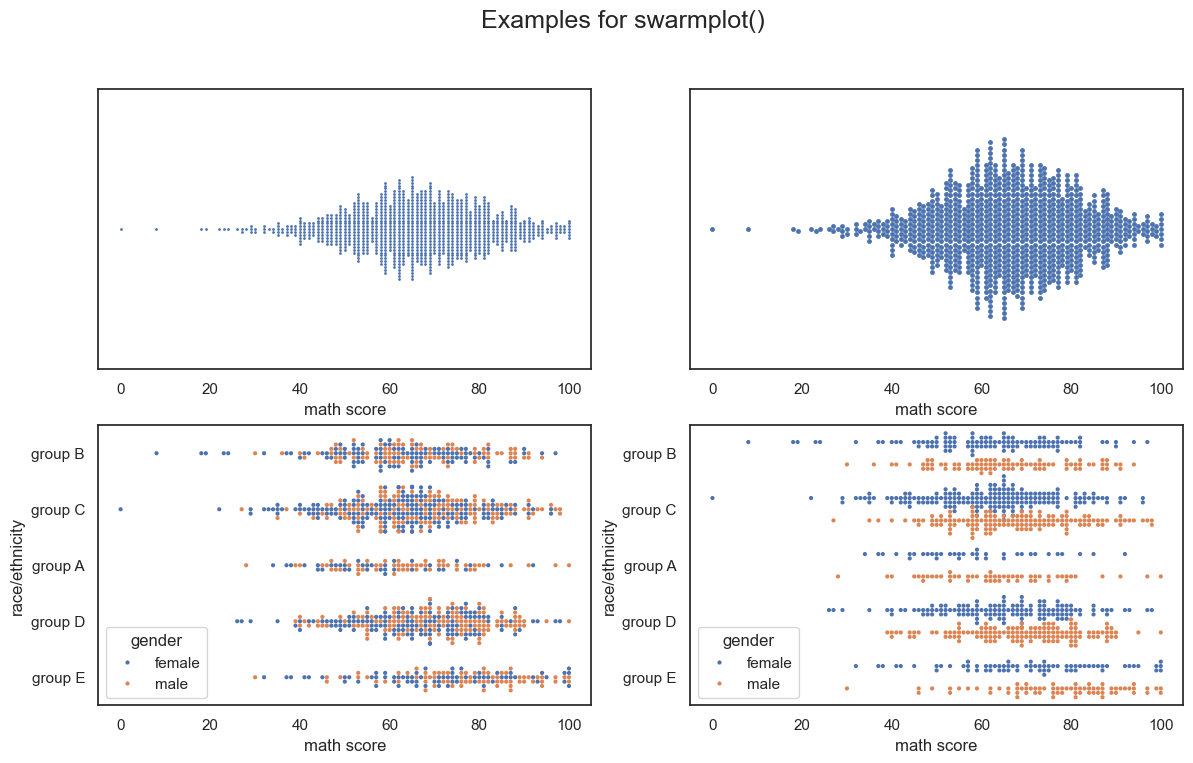

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
sns.swarmplot(
    data=df,
    x="math score",
    size=2,
    ax=ax1,
)
sns.swarmplot(
    data=df,
    x="math score",
    size=3.5,
    ax=ax2,
)
sns.swarmplot(
    data=df,
    x="math score",
    y="race/ethnicity",
    hue="gender",
    size=3,
    ax=ax3,
)
sns.swarmplot(
    data=df,
    x="math score",
    y="race/ethnicity",
    hue="gender",
    size=3,
    dodge=True,
    ax=ax4,
)
plt.suptitle("Examples for swarmplot()", fontsize=18)
plt.show()

`boxplot()` is useful to show the IQR (interquartile range), first quartile, median, third quartile, whiskers for the range of non-outliers, and outlier values one by one.

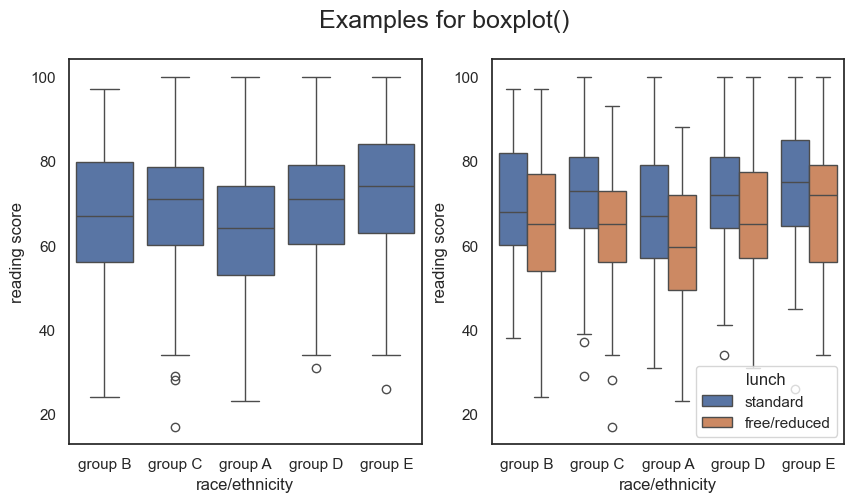

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    ax=ax1,
)
sns.boxplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    hue="lunch",
    ax=ax2,
)
plt.suptitle("Examples for boxplot()", fontsize=18)
plt.show()

For large datasets, and more details about the distribution, `boxenplot()` can be used, which is also called letter-value plot.

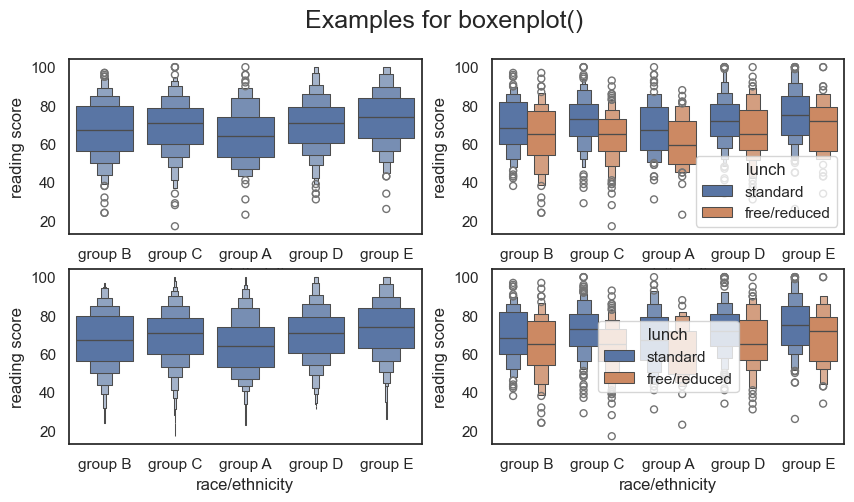

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))
sns.boxenplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    ax=ax1,
)
sns.boxenplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    hue="lunch",
    ax=ax2,
)
sns.boxenplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    k_depth="full", # tukey, proportion, trustworthy, full, or a number
    ax=ax3,
)
sns.boxenplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    hue="lunch",
    k_depth=3, # tukey, proportion, trustworthy, full, or a number
    ax=ax4,
)
plt.suptitle("Examples for boxenplot()", fontsize=18)
plt.show()

`violinplot()` is very similar to `boxplot()`, but instead of showing only a summarization, violin plots display the entire distribution. Can be slow for large datasets.

The `density_norm=` parameter sets how the shape of the violins is determined: using an equal "area", equal "width", or width based on "count" for the violins.

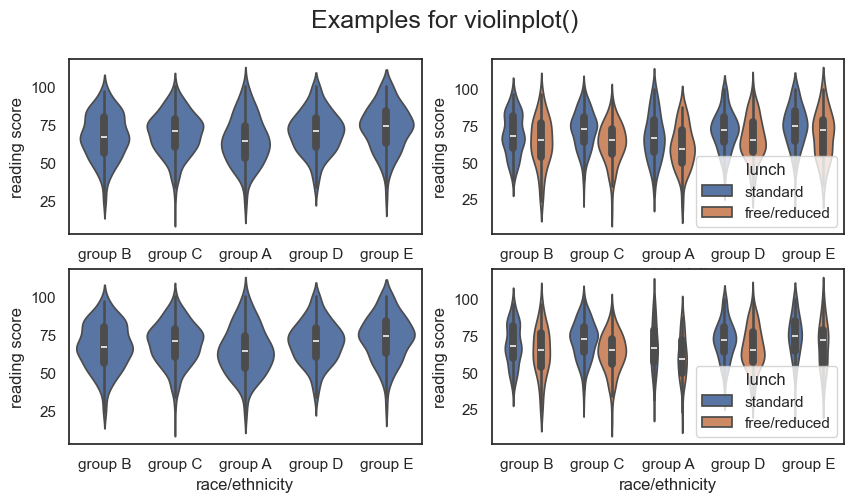

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))
sns.violinplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    ax=ax1,
)
sns.violinplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    hue="lunch",
    ax=ax2,
)
sns.violinplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    density_norm="width",
    ax=ax3,
)
sns.violinplot(
    data=df,
    y="reading score",
    x="race/ethnicity",
    hue="lunch",
    density_norm="count",
    ax=ax4,
)
plt.suptitle("Examples for violinplot()", fontsize=18)
plt.show()

A similar, simple variant is `pointplot()`, which displays only a summarized value (based on an estimator), with confidence intervals.

The lines are drawn by default, but can be omitted using `linestyle="none"`.

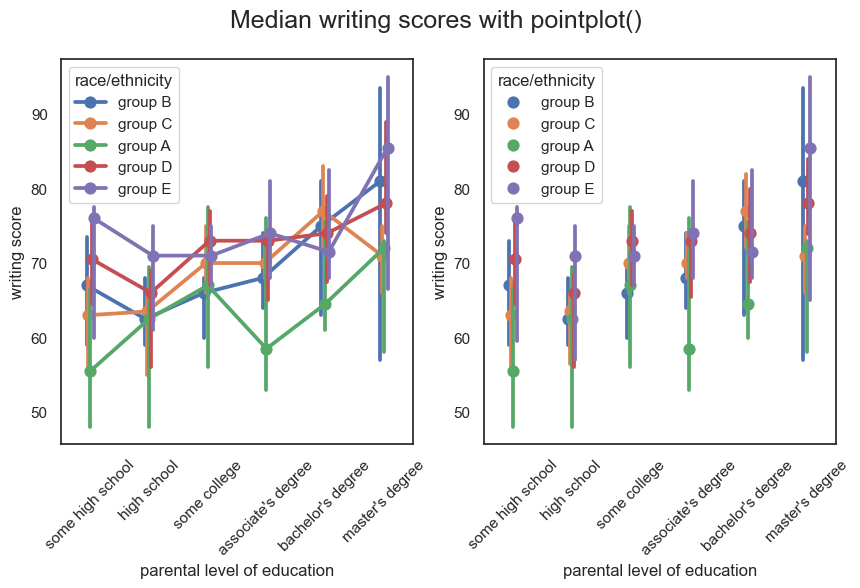

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.pointplot(
    data=df,
    x="parental level of education",
    y="writing score",
    hue="race/ethnicity",
    estimator="median",
    dodge=True,
    # ci=95,
    ax=ax1,
)
ax1.tick_params(axis='x', rotation=45)
sns.pointplot(
    data=df,
    x="parental level of education",
    y="writing score",
    hue="race/ethnicity",
    estimator="median",
    dodge=True,
    # join=False, # deprecated
    linestyle="none",
    # ci=95,
    ax=ax2,
)
ax2.tick_params(axis='x', rotation=45)
plt.suptitle("Median writing scores with pointplot()", fontsize=18)
plt.show()

Is `catplot()` is a wrapper function for the categorical plots listed here. It expects a `kind=` parameter for selecting the chart type. All customization parameterers are passed to the specific

`catplot()` also supports faceting by the `row=` and `column=` parameters.

Note that `catplot()` is a figure-level function that creates its own `FacetGrid`, so `ax=` is not supported. However, the the inner axes can be customized.

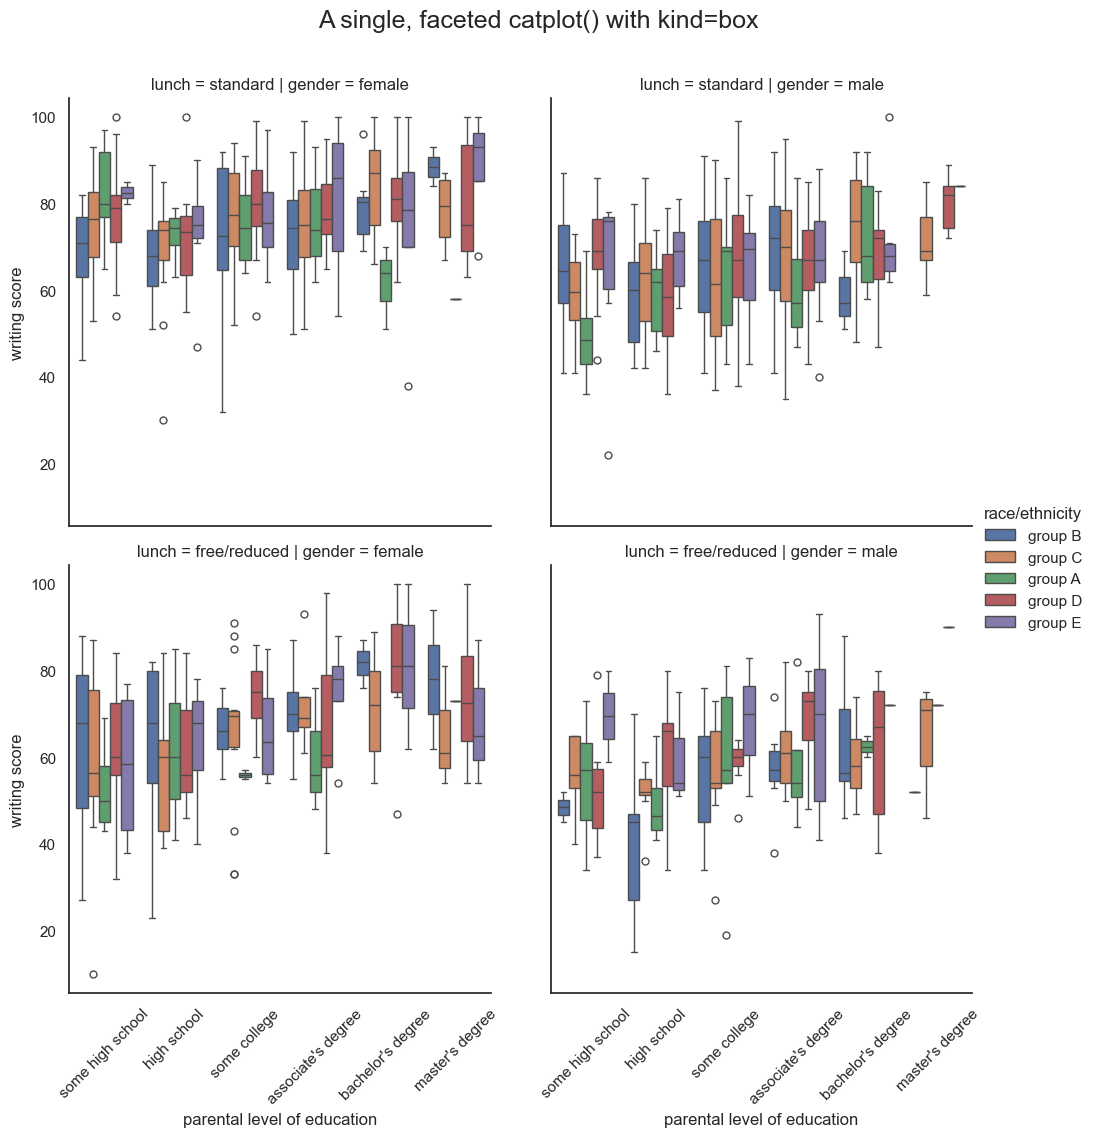

In [40]:
# assigning the returning FacetGrid is only needed for further customization.
g1 = sns.catplot(
    data=df,
    kind="box",
    x="parental level of education",
    y="writing score",
    hue="race/ethnicity",
    col="gender",
    row="lunch",
)
for ax in g1.axes.flat:
    ax.tick_params(axis='x', rotation=45)
plt.suptitle("A single, faceted catplot() with kind=box", fontsize=18, y=1.05)
plt.show()

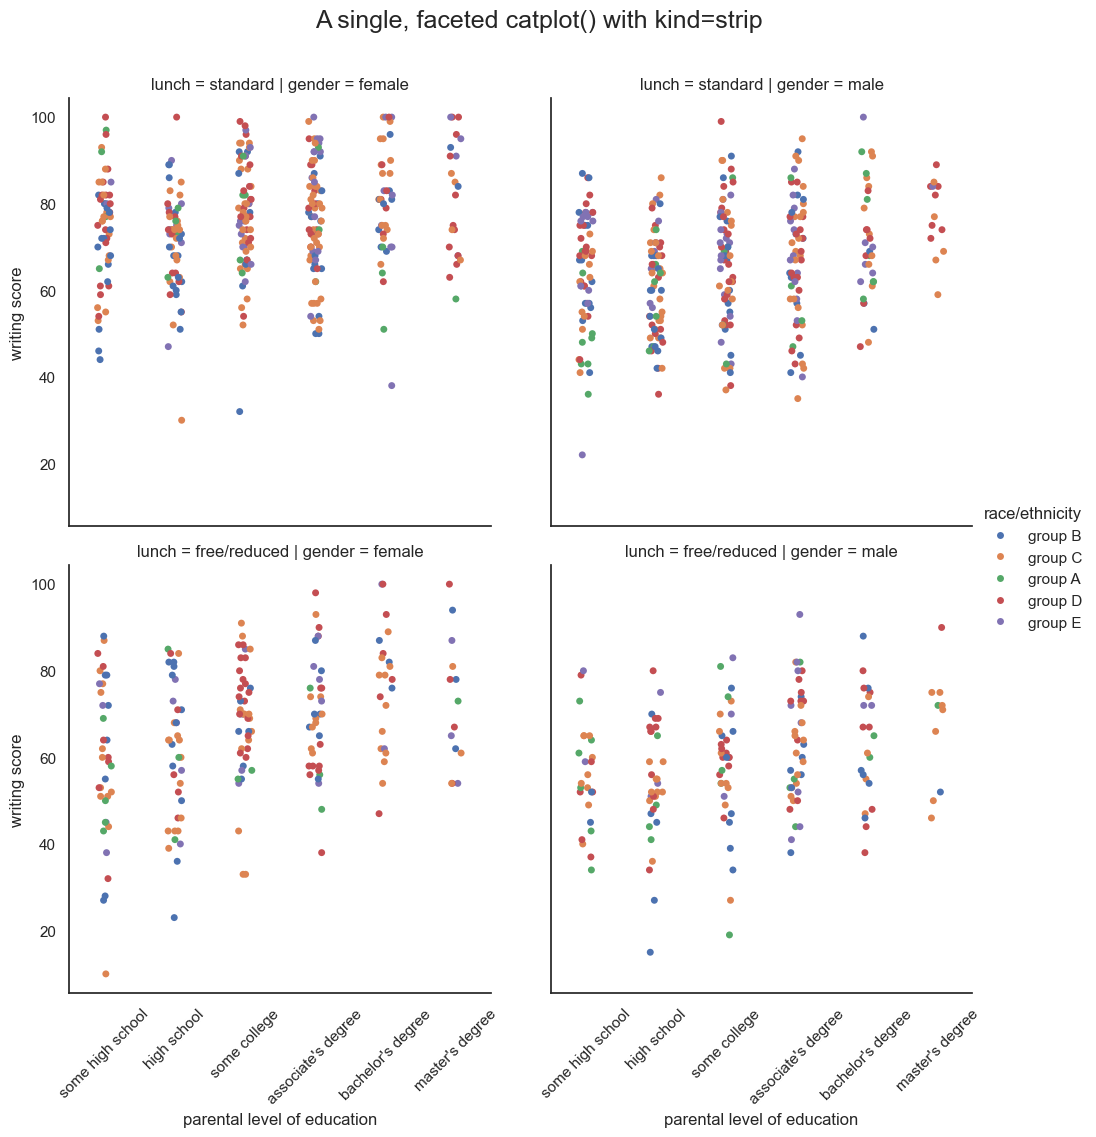

In [41]:
# assigning the returning FacetGrid is only needed for further customization.
g2 = sns.catplot(
    data=df,
    kind="strip",
    x="parental level of education",
    y="writing score",
    hue="race/ethnicity",
    col="gender",
    row="lunch",
)
for ax in g2.axes.flat:
    ax.tick_params(axis='x', rotation=45)
plt.suptitle("A single, faceted catplot() with kind=strip", fontsize=18, y=1.05)
plt.show()

## Exercise (Categorical charts)


Create categorical charts with `seaborn`, one for each of the following scenarios.

*   Display the math scores of students for each parental educational background, and each gender. Try finding a plot which expects a small number of students.
*   Display the distribution of total scores (sum of the three subjects) for students that have a satisfactory score in each subject (>=50), per race/ethnicity.
*   Display a vertical, clustered bar chart showing median scores per race/ethnicity and lunch type.

## Solution (Categorical charts)

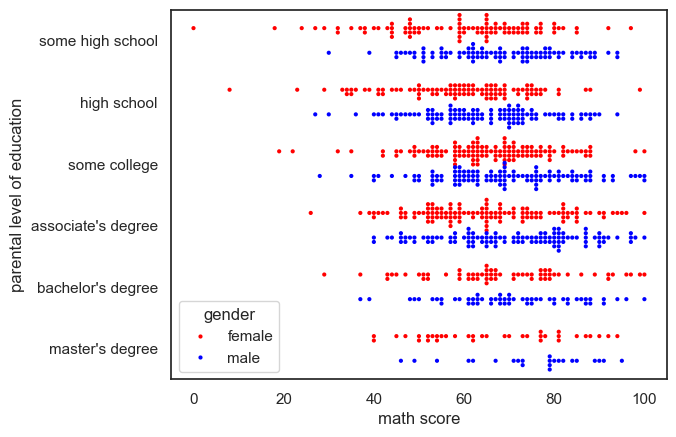

In [42]:
sns.swarmplot(
    data=df,
    x="math score",
    y="parental level of education",
    hue="gender",
    size=3, # adjust if points are too large
    palette=["red","blue"],
    dodge=True,
)
plt.show()

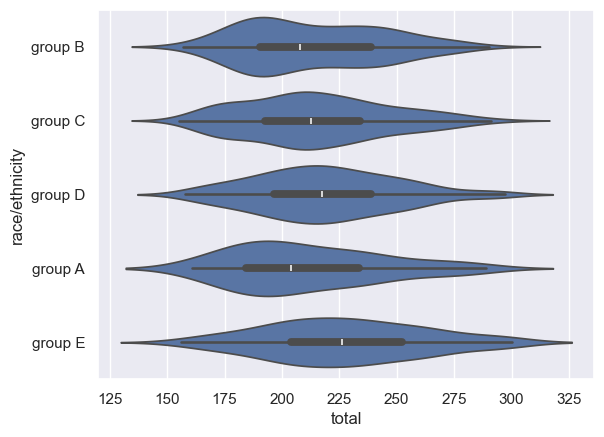

In [43]:
df_extra = df.copy()
df_extra["total"] = df["math score"] + df["reading score"] + df["writing score"]
df_extra = df_extra[(df_extra["math score"] >= 50) &
                    (df_extra["reading score"] >= 50) &
                    (df_extra["writing score"] >= 50)]
with sns.axes_style("darkgrid"):
    sns.violinplot(
        data=df_extra,
        x="total",
        y="race/ethnicity",
        dodge=True,
    )
    # or boxplot, boxenplot
plt.show()

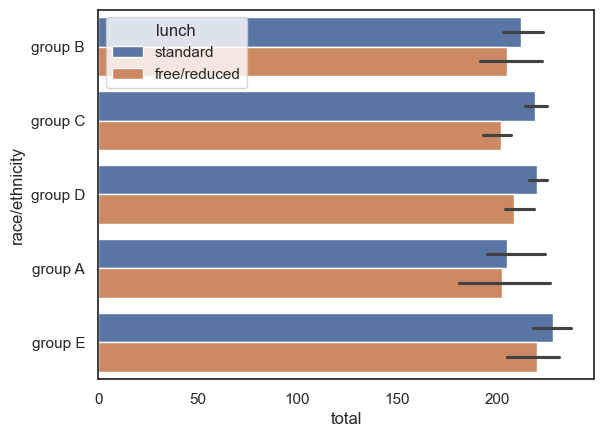

In [44]:
sns.barplot(
    data=df_extra,
    x="total",
    y="race/ethnicity",
    hue="lunch",
    estimator="median", # or np.median
)
plt.show()

# Other, special chart types



Heatmaps can be drawn with `seaborn` as well, using the `heatmap()` function, by providing the data matrix directly. The `annot=` parameter can be used to display the input data. There is a variety of other formatting options.

The following example shows a heatmap on a correlation matrix.

In [45]:
df_num = df[["math score", "reading score", "writing score"]]
matrix = df_num.corr()
matrix

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


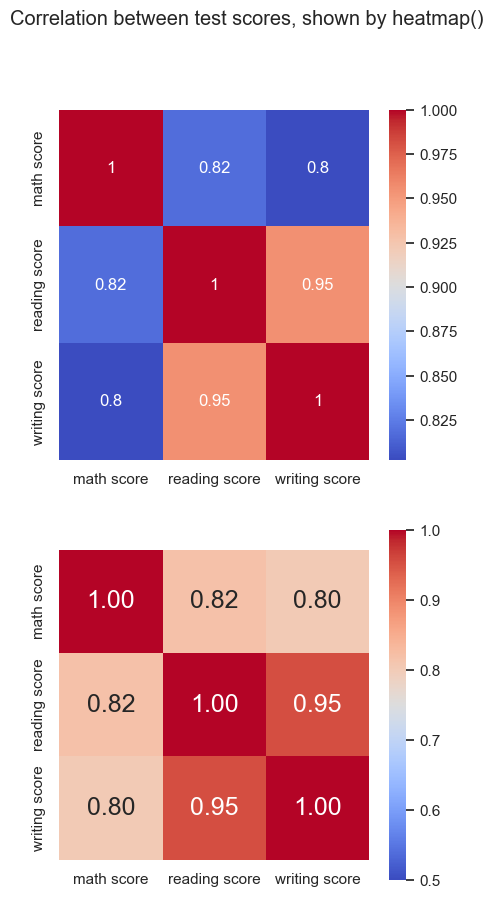

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 10))
sns.heatmap(
    matrix,
    annot=True,
    cmap="coolwarm",
    ax=ax1,
)
sns.heatmap(
    matrix,
    annot=True,
    annot_kws={"size": 18},
    cmap="coolwarm",
    vmin=0.5,
    fmt="0.2f",
    square=True,
    ax=ax2,
)
plt.suptitle("Correlation between test scores, shown by heatmap()")
plt.show()
matrix

The `clustermap()` function is similar to a `heatmap()`, but it enhances it with hierarchical clustering. It is a figure-level function.

The distance metric can be set by the `metric=` parameter (default is "euclidean"), and the clustering method can be set by the `method=` parameter (default is "single").

In [47]:
sns.clustermap(
    matrix,
    annot=True,
    metric="euclidean",
    method="single",
    cmap="coolwarm",
)
plt.title("Correlation between test scores")
plt.show()

RuntimeError: clustermap requires scipy to be available

The `relplot()` wrapper function can be used to display a relationship between two fields. For the `kind=` parameter, there are two options:

*   "line" for `lineplot()`
*   "scatter" for `scatterplot()`

The following example shows an example for `kind="line"`, drawing confidence intervals by default.

Note that **a line plot is not meaningful in this context**, since that is better suited when one of the variables depends on the other, e.g. for a time series.

In [ ]:
sns.relplot(
    data=df,
    x="writing score",
    y="reading score",
    hue="test preparation course",
    col="lunch",
    kind="line",
)
plt.suptitle("relplot() using kind=\"line\" (not meaningful)", y=1.01)
plt.show()

The same dataset can be much better represented by a scatter plot.

In [ ]:
sns.relplot(
    data=df,
    x="writing score",
    y="reading score",
    hue="test preparation course",
    col="lunch",
    kind="scatter",
)
plt.suptitle("relplot() using kind=\"scatter\"", y=1.01)
plt.show()

`jointplot()` is another figure-level function that can be used to show the relationship between two numeric columns. The type of plot used for showing the joint distribution is set by the `kind=` parameter, for which the following options are supported: "hist", "kde", "scatter", "reg", "hex", "resid".

For each of the two individual numeric columns, a marginal plot is also shown, which is a histogram or KDE plot depending on the chosen joint type. However, the format of both the joint and the marginal plots could be customized.

In [ ]:
jointplot_kind = "scatter" # worth trying all others!
sns.jointplot(
    data=df,
    x="writing score",
    y="reading score",
    kind=jointplot_kind,
)
plt.suptitle(f"jointplot() example, with kind=\"{jointplot_kind}\"", y=1.01)
plt.show()

In [ ]:
sns.jointplot(
    data=df,
    x="writing score",
    y="reading score",
    hue="test preparation course", # note: not all plot kinds support hue
    kind="kde",
)
plt.suptitle("jointplot() example, with hue and KDE plot type", y=1.01)
plt.show()

`residplot()` can be used to display a residual plot, used for regression analysis. This is also built in to `jointplot()`.

In [ ]:
sns.jointplot(
    data=df,
    x="writing score",
    y="reading score",
    kind="resid",
)
plt.suptitle("jointplot() example, showing a residplot() in the middle", y=1.01)
plt.show()

`pairplot()` can be used to explore relationships between numeric fields of a dataset. By default, histograms for each single field and scatter charts for all pairs of fields are displayed.

In [ ]:
sns.pairplot(df) # or: data=df
plt.suptitle("default pairplot() generated for the whole dataset", y=1.01)
plt.show()

`pairplot()` supports the `hue=` parameter, which adds an additional categorization as for other chart types.

and `diag_kind=` parameter sets the chart type for diagonals ("hist" or "kde").

The `kind=` parameter sets the chart type for non-diagonal pairs ("scatter", "kde", or "reg").

In [ ]:
sns.pairplot(
    data=df,
    hue="test preparation course",
    diag_kind="kde",
    kind="reg",
)
plt.suptitle("pairplot() with hue, kdeplot(), regplot()", y=1.01)
plt.show()

## Exercise (Other charts)

Calculate a matrix containing average math scores for each race/ethnicity and parental level of education, then perform and display a clustering of each field based on the aggregated results.

## Solution (Other charts)

The required matrix can be constructed with `pandas` using either `groupby() + unstack()` or `pivot_table()`.

In [ ]:
df_spec = (df
    .groupby(["race/ethnicity", "parental level of education"], observed=True)
    ["math score"]
    .mean()
    .unstack()
)
df_spec

In [ ]:
df_spec = df.pivot_table(
    index="parental level of education",
    columns="race/ethnicity",
    values="math score",
    aggfunc="mean",
    observed=True,
)
df_spec

The application of the clustering is now straightforward.

In [ ]:
sns.clustermap(
    df_spec,
    annot=True,
    cmap="coolwarm",
)
plt.show()

# Seaborn Objects

*Seaborn Objects* is a new, grammar-of-graphics-style API for `seaborn`. A few examples for its usage is shown here.

As of 2025, the Objects API is still evolving, so options better than shown here may be possible.

In [ ]:
import seaborn.objects as so

 The approach of the Objects API is vastly different from the original. Instead of a range of plotting functions, the features of the plot are added one by one using a fluent interface.

The following example creates a scatter chart, with custom colors, regression lines, faceting by another category field, and custom labels.

The final `.show()` call can be used to render the object, but it may be optional in notebooks (like for the classic API and `matplotlib`).

In [ ]:
(
    so.Plot(
          data=df,
          x="math score",
          y="reading score",
          color="test preparation course",
      )
      .scale(color={"none": "#FF4444", "completed": "green"})
      .add(so.Dot(alpha=0.7))
      .add(so.Line(), so.PolyFit(order=1))
      .facet(row="gender")
      .label(
          title="Math vs Reading Scores",
          x="Math score",
          y="Reading score",
          color="test preparation course",
      )
      # .show()
)

In this code, `so.Dot()` and `so.Line()` are **mark objects**, that control how data points are drawn. A few marks are supported, other examples include `so.Bar()`, and `so.Area()`.

The following example creates a stacked bar chart. Note that the aggregation of data is performed manually.

In [ ]:
df_stacked = (
    df.groupby(["parental level of education", "race/ethnicity"],
               observed=True, as_index=False)
      ["reading score"].sum()
)
df_stacked.head(7)

In [ ]:
(
    so.Plot(
          data=df_stacked,
          x="reading score",
          y="parental level of education",
          color="race/ethnicity",
      )
      .add(so.Bar(), so.Stack())
      # .show()
)

With minimal modification, the same chart can be drawn as a stacked area chart.

In [ ]:
(
    so.Plot(
          data=df_stacked,
          x="reading score",
          y="parental level of education",
          color="race/ethnicity",
      )
      .add(so.Area(), so.Stack())
      # .show()
)

Visualizing a KDE is also possible, but currently, it must be computed manually and then added as an ordinary `so.Line()` plot.

In [ ]:
from scipy.stats import gaussian_kde

kde_list = []
for gender, group in df.groupby("gender", observed=True):
    kde = gaussian_kde(group["math score"])
    x_grid = np.linspace(group["math score"].min(), group["math score"].max(), 200)
    kde_list.append(pd.DataFrame({
        "x": x_grid,
        "density": kde(x_grid),
        "gender": gender,
    }))

kde_df = pd.concat(kde_list, ignore_index=True)

(
    so.Plot(
          kde_df,
          x="x",
          y="density",
          color="gender",
      )
      .add(so.Line())
      # .show()
)

The functionality of `stripplot()` can also be achieved by manually adding a jitter to visualized points.

In [ ]:
(
    so.Plot(
          data=df,
          x="writing score",
          y="race/ethnicity",
          color="test preparation course",
      )
      .add(so.Dot(), so.Jitter())
      # .show()
)

As of writing this tutorial (2025), the Seaborn Objects API is currently under development. More supported plots and flexible usage is expected in the future.  

## Exercise (Seaborn Objects API)

Create a faceted chart with the Objects API as follows:

*   Median writing scores per race/ethnicity are shown in a bar chart.
*   The chart is faceted by gender in columns.
*   The chart is faceted by preparation test course in rows.

## Solution (Seaborn Objects API)

In [ ]:
df_medians = (
    df.groupby(["race/ethnicity", "gender", "test preparation course"],
               observed=True, as_index=False)
      ["writing score"].median()
)
(
    so.Plot(
          data=df_medians,
          x="writing score",
          y="race/ethnicity",
      )
      .add(so.Bar())
      .facet(row="test preparation course", col="gender")
)